In [1]:
import numpy as np

In [2]:
def tweedie_eval(y_pred, y_true, p=1.9):
    a = y_true*np.power(y_pred, (1-p)) / (1-p)
    b = np.power(y_pred, (2-p))/(2-p)
    loss = -a + b
    return np.mean(loss)

In [28]:
import matplotlib.pyplot as plt
import scipy.special as sps 


def analysis_loss(true,pred):
    shape, scale = true, 2.  # mean=4, std=2*sqrt(2)
    y_true = np.random.gamma(shape, scale, 1000)
    shape, scale = pred, 2.  # mean=4, std=2*sqrt(2)
    y_pred = np.random.gamma(shape, scale, 1000)


    fig = plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    count, bins, ignored = plt.hist(y_true, 50, density=True, color='b',alpha = 0.5) 
    y = bins**(shape-1)*(np.exp(-bins/scale) /  
                         (sps.gamma(shape)*scale**shape))
    plt.plot(bins, y, linewidth=2, color='b',alpha = 0.5,label='true')  

    count, bins, ignored = plt.hist(y_pred, 50, density=True, color='r',alpha = 0.5) 
    y = bins**(shape-1)*(np.exp(-bins/scale) /  
                         (sps.gamma(shape)*scale**shape))
    plt.plot(bins, y, linewidth=2, color='r',alpha = 0.5,label='pred')  

    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(y_true,'bo',alpha = 0.5,label='true')  
    plt.plot(y_pred,'ro',alpha = 0.5,label='pred') 
    plt.legend()

    plt.show()

    for i in [1.01,1.05,1.1,1.4,1.5,1.6,1.7]:
        print('p=',i,' - loss = ',tweedie_eval(y_pred, y_true, p=i))

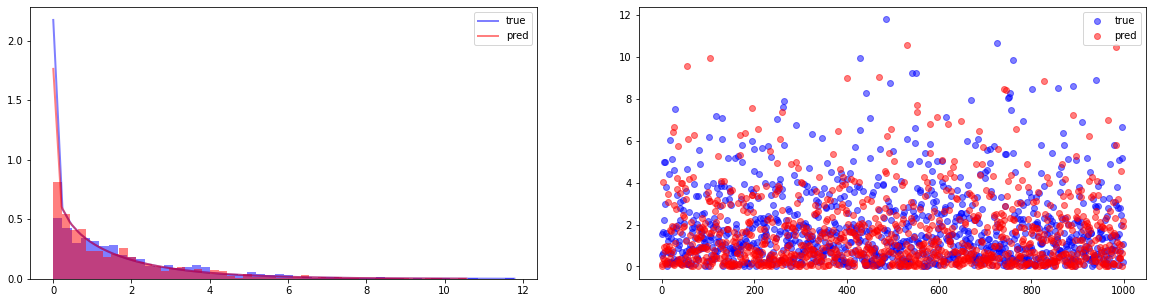

p= 1.01  - loss =  194.93341118634112
p= 1.05  - loss =  40.70568223465497
p= 1.1  - loss =  21.54335415430328
p= 1.4  - loss =  8.338999753253653
p= 1.5  - loss =  8.12559077289404
p= 1.6  - loss =  8.559531260011191
p= 1.7  - loss =  9.744567498779585


In [29]:
analysis_loss(1,0.8)

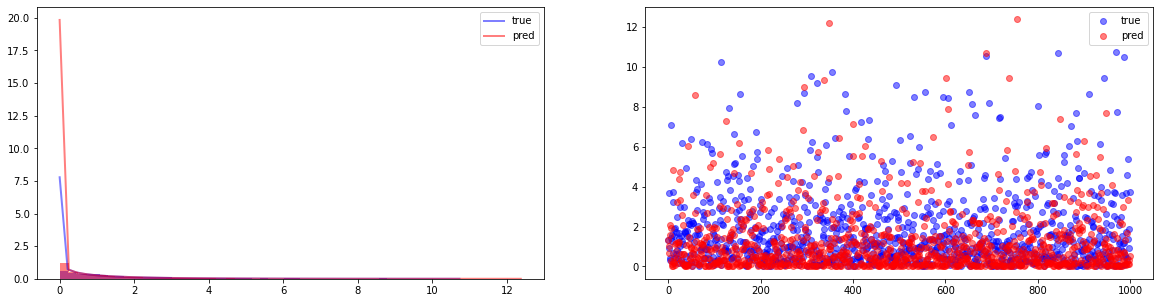

p= 1.01  - loss =  191.25742454384337
p= 1.05  - loss =  40.61242946838284
p= 1.1  - loss =  22.005416374399182
p= 1.4  - loss =  10.878631589499294
p= 1.5  - loss =  12.250543256205038
p= 1.6  - loss =  15.547836644190559
p= 1.7  - loss =  22.114016860639097


In [30]:
analysis_loss(1,0.6)

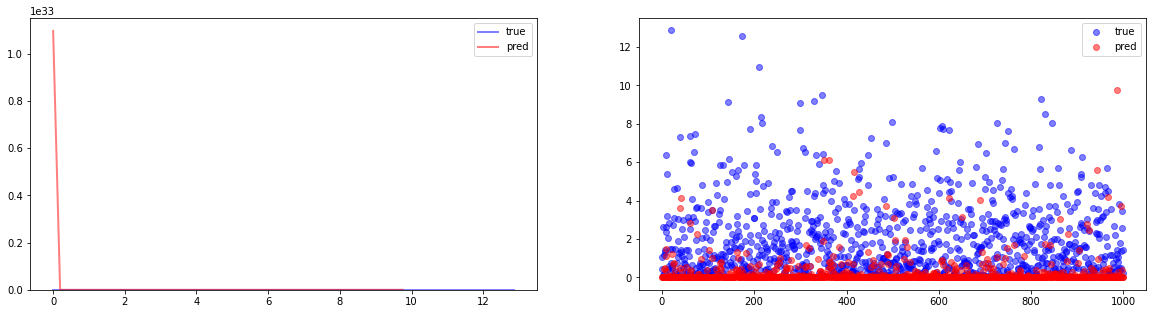

p= 1.01  - loss =  225.72936453594625
p= 1.05  - loss =  84.2467097563229
p= 1.1  - loss =  295.14511302055683
p= 1.4  - loss =  5137863744456.661
p= 1.5  - loss =  2.4672197684390116e+16
p= 1.6  - loss =  1.2439572917963584e+20
p= 1.7  - loss =  6.466110015844646e+23


In [31]:
analysis_loss(1,0.1)

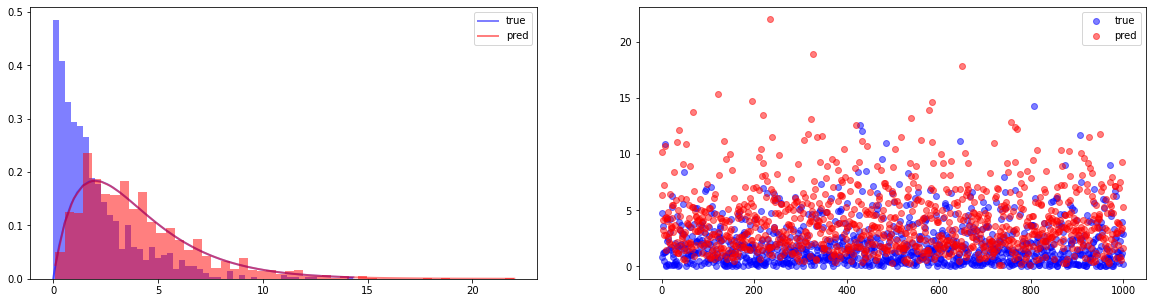

p= 1.01  - loss =  197.81677790274978
p= 1.05  - loss =  40.987091455815616
p= 1.1  - loss =  21.37252757153239
p= 1.5  - loss =  6.195300460008387
p= 1.7  - loss =  6.302869950491339


In [25]:
analysis_loss(1,2)

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


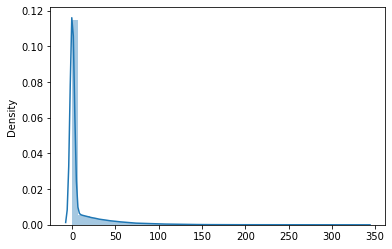

In [33]:
!pip install tweedie

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [ ]:
import tweedie, seaborn as sns, matplotlib.pyplot as plt

tvs = tweedie.tweedie(mu=10, p=0.6, phi=30).rvs(100000)

sns.distplot(tvs)
plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


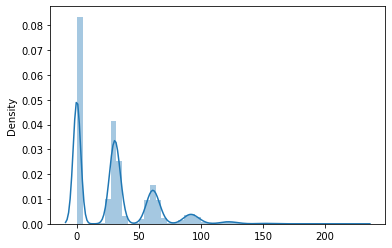

In [42]:
import tweedie, seaborn as sns, matplotlib.pyplot as plt

tvs = tweedie.tweedie(mu=30, p=1.01, phi=30).rvs(100000)

sns.distplot(tvs)
plt.show()